Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Saving the link in variable 'url' and then reading it as dataframe named 'df'.

In [2]:
url = 'http://bit.ly/w-data'

In [3]:
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Let us check the correlation between 'Hours Studied' and 'Marks Scored'.

In [5]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Correlation seems to pretty good as it is 98% approx.
Correlation score reveals variables to be positively linearly related, so let us visualise it through a scatterplot.

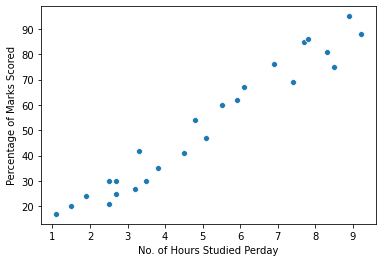

In [6]:
sns.scatterplot('Hours','Scores', data = df)
plt.xlabel('No. of Hours Studied Perday')
plt.ylabel('Percentage of Marks Scored')
plt.show()

Importing more libraries for further assessment and model building

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

Dividing variables as Independent Variable and Dependent Variable.

In [8]:
iv = df[['Hours']]
dv = df['Scores']

Splitting data into Train data and Test data. Then training it using Linear Regression algorithm.

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(iv, dv, test_size = 0.2, random_state = 25)

In [10]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
train_pred = lr.predict(xtrain)

In [11]:
print('\033[1m' + 'Evaluation Metrics of Trained Data' +'\033[0m')
print('Accuracy Score = ', lr.score(xtrain, ytrain))
print('Root Mean Squared Error = ', np.sqrt(mean_squared_error(ytrain, train_pred)))
print('Mean Absolute Error = ', mean_absolute_error(ytrain, train_pred))
print('Root Mean Squared Log Error = ', np.sqrt(mean_squared_log_error(ytrain, train_pred)))

Evaluation Metrics of Trained Data
Accuracy Score =  0.9526743156185514
Root Mean Squared Error =  5.344431078382381
Mean Absolute Error =  4.835590214551502
Root Mean Squared Log Error =  0.1197951448422568


In [12]:
test_pred = lr.predict(xtest)
act_pred = pd.DataFrame({'Actual':ytest, 'Predicted':test_pred})
act_pred

,Actual,Predicted
2,27,34.039712
9,25,29.268910
17,24,21.635627
10,85,76.976930
21,54,49.306278


In [13]:
print('\033[1m' + 'Evaluation Metrics of Test Data' +'\033[0m')
print('Accuracy Score = ', lr.score(xtest, ytest))
print('Root Mean Squared Error = ', np.sqrt(mean_squared_error(ytest, test_pred)))
print('Mean Absolute Error = ', mean_absolute_error(ytest, test_pred))
print('Root Mean Squared Log Error = ', np.sqrt(mean_squared_log_error(ytest, test_pred)))

Evaluation Metrics of Test Data
Accuracy Score =  0.9434635261365244
Root Mean Squared Error =  5.65282363316214
Mean Absolute Error =  5.277957406381123
Root Mean Squared Log Error =  0.1420076107067942


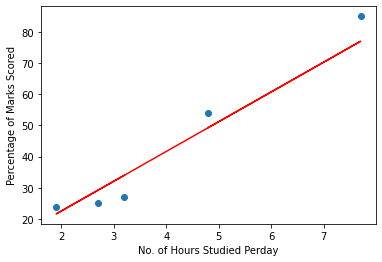

In [14]:
# Plotting the actual Y (blue dots) and predicted Y (red line) of test set
plt.plot(xtest, test_pred, 'r')
plt.scatter(xtest, ytest)
plt.xlabel('No. of Hours Studied Perday')
plt.ylabel('Percentage of Marks Scored')
plt.show()

In [15]:
b0 = lr.intercept_
b1 = lr.coef_
print('Intercept measure from training data = ', b0)
print('Coefficient measure from training data = ', b1)

Intercept measure from training data =  3.5065790515398447
Coefficient measure from training data =  [9.54160399]


In [16]:
x = 9.25
y_pred =  b0 + b1*x
print('If a student studies for 9.25 hours perday, on an average he/she might score: ', y_pred)

If a student studies for 9.25 hours perday, on an average he/she might score:  [91.76641596]
